## <center> AGE OF EMPIRES II: DE PATCH 47820 - ARABIA 1v1</center>

![46295](https://static.ageofempires.com/aoe/wp-content/uploads/2021/04/AgeOfEmpires_2DE_UPDATE_2021.jpg)

### ANÁLISIS EXPLORATORIO DE LOS DATOS.

#### LIBRERÍAS UTILIZADAS.

In [1]:
## Importación de datos.
from sqlalchemy import create_engine

## Tratamiento de datos.
import pandas as pd
import numpy as np

## Gráficos.
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

## Configuración warnings.
import warnings
warnings.filterwarnings('ignore')

#### QUERY A LA BBDD DE MARIADB.

In [2]:
# Nombre de usuario, contraseña y BBDD MySQL.
mysql_address = '172.30.248.86'
mysql_port = '3306'
mysql_username = 'mms'
mysql_password = 'agedb'
mysql_dbname = 'aoe2de'

# String que contiene la información necesaria para el login de MySQL.
mysql_str = ('mysql+pymysql://{username}:{password}@{ipaddress}:{port}/{dbname}'
.format(username = mysql_username,
password = mysql_password,
ipaddress = mysql_address,
port = mysql_port,
dbname = mysql_dbname))

In [3]:
# Query para importar los datos desde MySQL.
cnx = create_engine(mysql_str)
query = f"""
SELECT
        matches.match_id,
        matches.version,
        matches.server,
        matches.duration_minutes,
        players.profile_id,
        players.player_name,
        players.country,
        players.rating,
        players.color,
        players.team,
        players.civ,
        players.won
FROM
    matches, players
WHERE
    matches.match_id = players.match_id
AND
    matches.version = '47820'
AND
    matches.map_type = 'Arabia'
AND
    matches.rating_type = '1v1 Random Map'
"""
df = pd.read_sql_query(query, con=cnx)
df.shape

(1326292, 12)

#### PREVISUALIZACIÓN DEL DATASET.

In [4]:
# Observamos los primeros 10 valores para ver que se han cargado correctamente.
df.head(10)

,match_id,version,server,duration_minutes,profile_id,player_name,country,rating,color,team,civ,won
0,88924823,47820,brazilsouth,34,1809052,SalvadorLimones,AR,941.0,blue,2,Vikings,0
1,88924823,47820,brazilsouth,34,4754263,ElefantAzul,UY,939.0,red,1,Saracens,1
2,88924912,47820,brazilsouth,19,1909434,susiladama,CL,NaN,yellow,1,Mayans,1
3,88924912,47820,brazilsouth,19,2609789,Nestor Majno,UY,974.0,green,2,Japanese,0
4,88924915,47820,eastus,19,2071119,WOLOLOCO,US,1072.0,blue,2,Mayans,0
5,88924915,47820,eastus,19,3230134,Oh Boy !,TR,1097.0,red,1,Magyars,1
6,88924920,47820,ukwest,18,294305,MadBeaver,CA,1647.0,red,1,Burgundians,0
7,88924920,47820,ukwest,18,455498,Yuki,DE,1660.0,blue,2,Mayans,1
8,88924992,47820,brazilsouth,27,2089088,AegonStark,MX,1264.0,red,1,Khmer,1
9,88924992,47820,brazilsouth,27,2609835,ElPichichi,AR,1265.0,blue,2,Franks,0


In [5]:
# Comprobación de valores NaN en el dataset.
df.isna().sum()

match_id                0
version                 0
server                  0
duration_minutes        0
profile_id              0
player_name             3
country             67133
rating              46304
color                   4
team                    0
civ                     0
won                     0
dtype: int64

In [6]:
# Rellenar valores vacíos de las varibales "color" y "country".
df.color.fillna("unknown", inplace=True)
df.country.fillna("UNKNOWN", inplace=True)

In [7]:
total_partidas = len(df.match_id.unique())
print("Total partidas: " + str(total_partidas))

Total partidas: 663146


#### Civilizaciones.

In [8]:
# Obtener los valores únicos de la variable "civ".
sorted_civs = df.civ.unique().tolist()
sorted_civs.sort()

In [9]:
def get_frequency_rates_by_civ(df):
    return pd.DataFrame(df.civ.value_counts(normalize=True)).reset_index().rename(columns={"index": "civ", "civ": "frequency"})

In [10]:
frequency_civs_singleplayer = get_frequency_rates_by_civ(df)

In [11]:
def get_win_rates_by_civ(df):
    return (
        df.groupby("civ")["won"]
            .mean()
            .reset_index()
            .rename(columns={"won": "win_rate"})
            .sort_values("win_rate", ascending=False)
            .reset_index(drop=True)
    )

In [12]:
winrate_civs_singleplayer = get_win_rates_by_civ(df)

#### Colores.

In [13]:
# Obtener los valores únicos de la variable "color".
sorted_colors = df.color.unique().tolist()
sorted_colors.sort()

In [14]:
def get_frequency_rates_by_color(df):
    return pd.DataFrame(df.color.value_counts(normalize=True)).reset_index().rename(columns={"index": "color", "color": "frequency"})

In [15]:
frequency_colors_singleplayer = get_frequency_rates_by_color(df)

#### Servidores.

In [16]:
# Obtener los valores únicos de la variable "server".
sorted_servers = df.server.unique().tolist()
sorted_servers.sort()

In [17]:
def get_frequency_rates_by_server(df):
    return pd.DataFrame(df.server.value_counts(normalize=True)).reset_index().rename(columns={"index": "server", "server": "frequency"})

In [18]:
frequency_server_singleplayer = get_frequency_rates_by_server(df)

#### Países.

In [19]:
# Obtener los valores únicos de la variable "country".
sorted_countries= df.country.unique().tolist()
sorted_countries.sort()

In [20]:
def get_frequency_rates_by_country(df):
    return pd.DataFrame(df.country.value_counts(normalize=True)).reset_index().rename(columns={"index": "country", "country": "frequency"})

In [21]:
frequency_country_singleplayer = get_frequency_rates_by_country(df)

#### ANÁLISIS PARTIDAS 1v1.

In [22]:
# Comprobación de valores NaN de cada variable.
df.isna().sum()

match_id                0
version                 0
server                  0
duration_minutes        0
profile_id              0
player_name             3
country                 0
rating              46304
color                   0
team                    0
civ                     0
won                     0
dtype: int64

In [23]:
df.describe()

,match_id,version,duration_minutes,profile_id,rating,team,won
count,1.326292e+06,1326292.0,1.326292e+06,1.326292e+06,1.279988e+06,1326292.0,1326292.0
mean,9.587248e+07,47820.0,2.432248e+01,2.530203e+06,1.187663e+03,1.5,0.5
std,3.967299e+06,0.0,1.108719e+01,1.684542e+06,3.002317e+02,0.5,0.5
min,8.892482e+07,47820.0,0.000000e+00,1.530000e+02,8.000000e+00,1.0,0.0
25%,9.250045e+07,47820.0,1.800000e+01,1.043150e+06,9.800000e+02,1.0,0.0
50%,9.576716e+07,47820.0,2.400000e+01,2.387461e+06,1.146000e+03,1.5,0.5
75%,9.941410e+07,47820.0,3.000000e+01,3.571718e+06,1.353000e+03,2.0,1.0
max,1.026707e+08,47820.0,2.400000e+02,6.079998e+06,2.640000e+03,2.0,1.0


Text(0.5, 0, 'ELO')

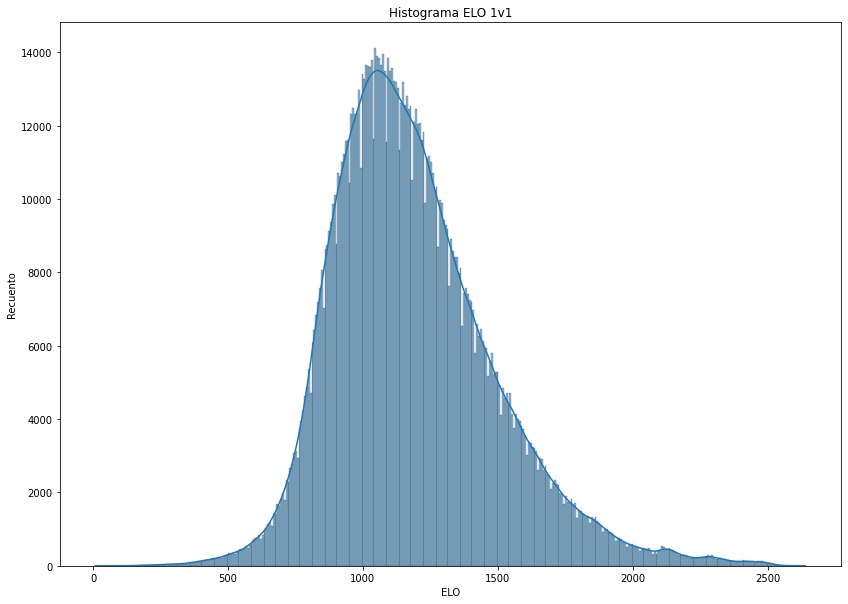

In [24]:
ax = sns.histplot(df.rating, stat="count", kde="True")
ax.set_title('Histograma ELO 1v1')
ax.set_ylabel('Recuento')
ax.set_xlabel('ELO')

<AxesSubplot:xlabel='rating'>

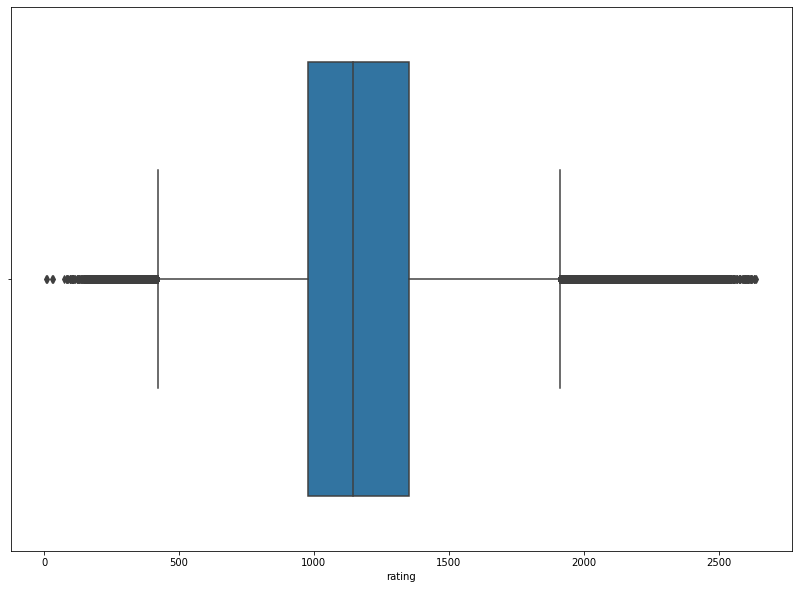

In [25]:
sns.boxplot(df.rating)

Text(0.5, 0, 'Duración en minutos')

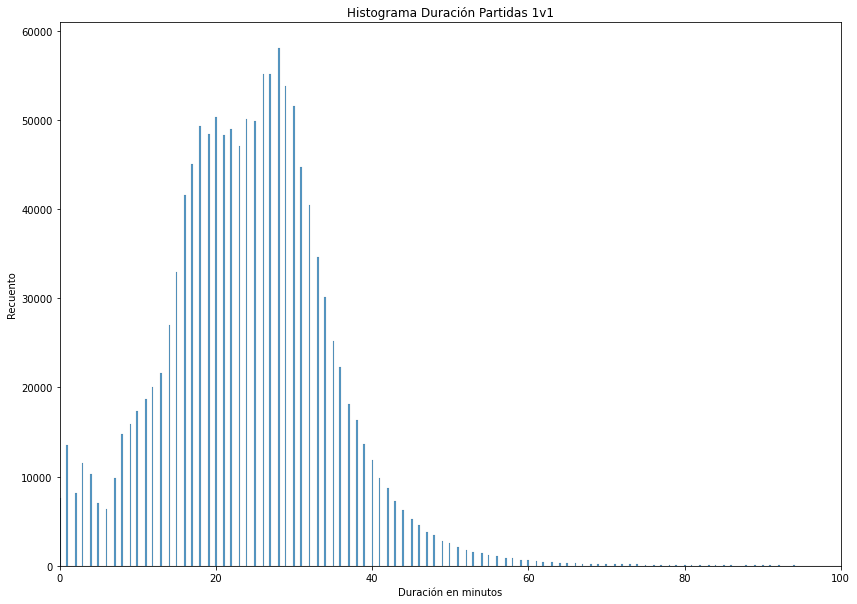

In [26]:
ax = sns.histplot(df.duration_minutes)
plt.xlim(0, 100)
ax.set_title('Histograma Duración Partidas 1v1')
ax.set_ylabel('Recuento')
ax.set_xlabel('Duración en minutos')

<AxesSubplot:xlabel='duration_minutes'>

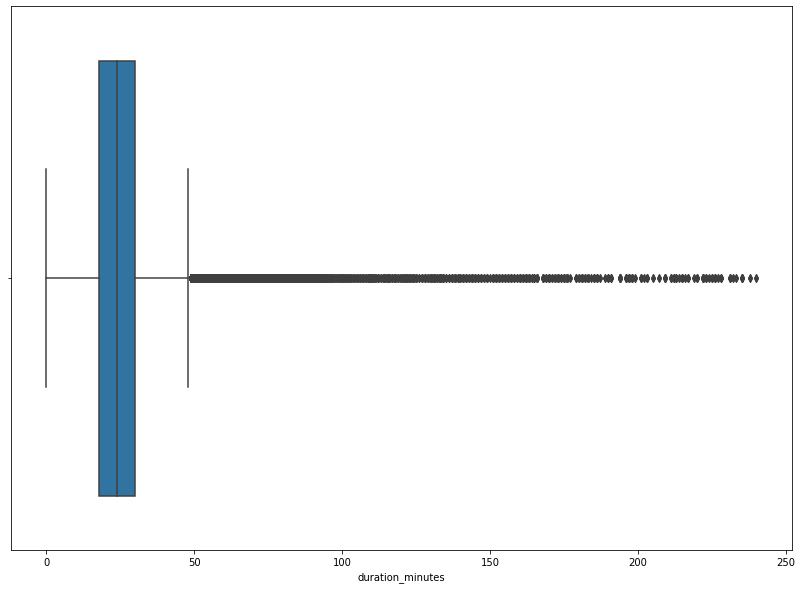

In [27]:
sns.boxplot(df.duration_minutes)

Text(0.5, 1.0, '% de Uso de Civilizaciones en partidas 1v1')

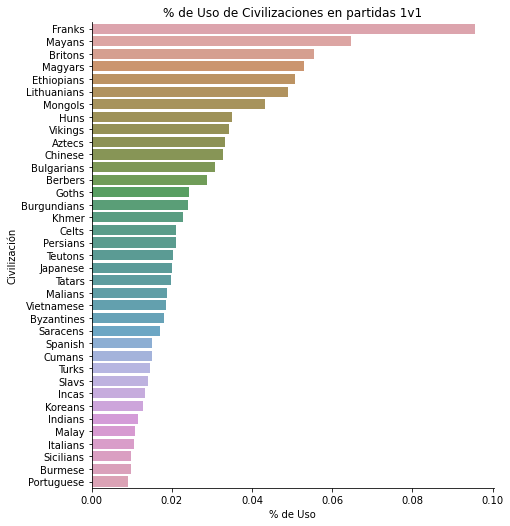

In [28]:
sns.catplot(y="civ", x="frequency",  data=frequency_civs_singleplayer, saturation=.5, kind="bar", ci=None, aspect=1, height=7)
plt.ylabel("Civilización")
plt.xlabel("% de Uso")
plt.title("% de Uso de Civilizaciones en partidas 1v1")

Text(0.5, 1.0, 'Porcentaje de Victorias de Civilizaciones en partidas 1v1')

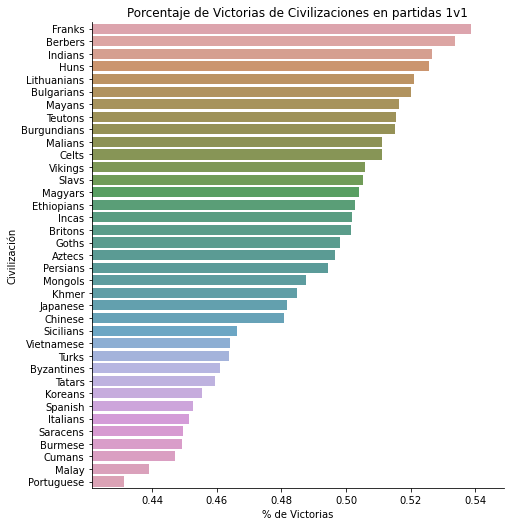

In [29]:
sns.catplot(y="civ", x="win_rate",  data=winrate_civs_singleplayer, saturation=.5, kind="bar", ci=None, aspect=1, height=7)
plt.ylabel("Civilización")
plt.xlabel("% de Victorias")
lim_sup = float(winrate_civs_singleplayer.win_rate.head(1) + 0.01)
lim_inf = float(winrate_civs_singleplayer.win_rate.tail(1) - 0.01)
plt.xlim(lim_inf, lim_sup)
plt.title("Porcentaje de Victorias de Civilizaciones en partidas 1v1")

Text(0.5, 1.0, '% de Partidas por Color en partidas 1v1')

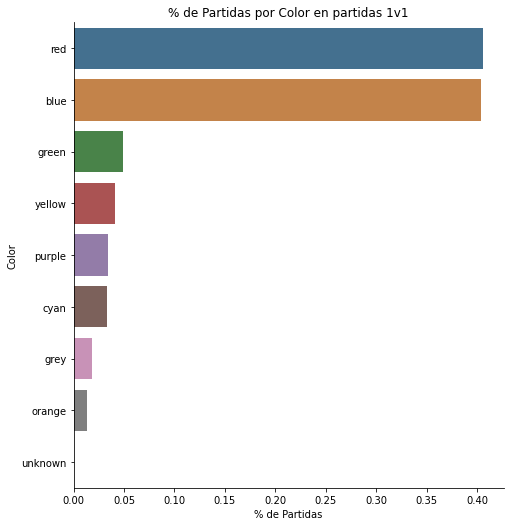

In [30]:
sns.catplot(y="color", x="frequency",  data=frequency_colors_singleplayer, saturation=.5, kind="bar", ci=None, aspect=1, height=7)
plt.ylabel("Color")
plt.xlabel("% de Partidas")
plt.title("% de Partidas por Color en partidas 1v1")

Text(0.5, 1.0, '% de Partidas por Servidor en partidas 1v1')

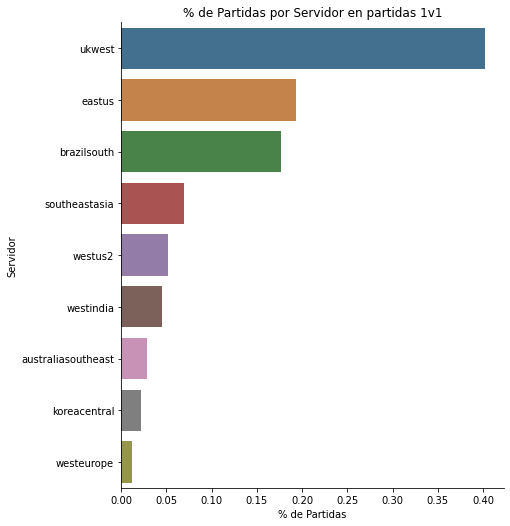

In [31]:
sns.catplot(y="server", x="frequency",  data=frequency_server_singleplayer, saturation=.5, kind="bar", ci=None, aspect=1, height=7)
plt.ylabel("Servidor")
plt.xlabel("% de Partidas")
plt.title("% de Partidas por Servidor en partidas 1v1")

Text(0.5, 1.0, '% de Partidas por Nacionalidad en partidas 1v1')

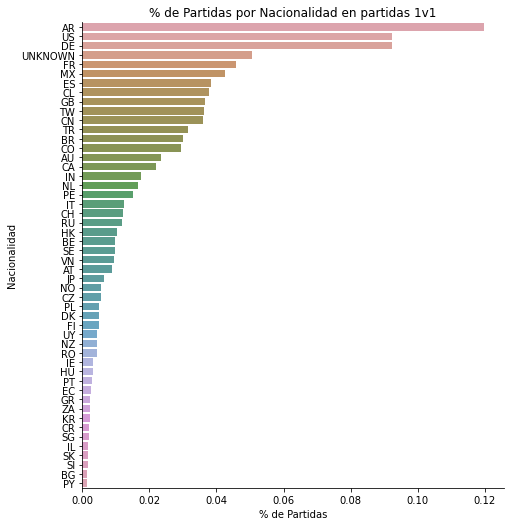

In [32]:
frequency_country_singleplayer = frequency_country_singleplayer.head(50)
sns.catplot(y="country", x="frequency",  data=frequency_country_singleplayer, saturation=.5, kind="bar", ci=None, aspect=1, height=7)
plt.ylabel("Nacionalidad")
plt.xlabel("% de Partidas")
plt.title("% de Partidas por Nacionalidad en partidas 1v1")

In [33]:
renames_singleplayer = {
    "profile_id": "opponent",
    "civ": "opponent_civ",
}
opponents_singleplayer = df[["match_id", "profile_id", "civ"]].rename(columns=renames_singleplayer)
vs_df = pd.merge(df, opponents_singleplayer, left_on="match_id", right_on="match_id").rename(columns={"profile_id": "player"})

# Dado que hemos fusionado el mismo marco de datos un jugador será un oponente de sí mismo, debemos eliminar esas filas.
vs_df = vs_df[vs_df["player"] != vs_df["opponent"]]
vs_df = vs_df[["match_id", "player", "opponent", "civ", "opponent_civ", "won"]]

In [34]:
vs_df.head(6)

,match_id,player,opponent,civ,opponent_civ,won
1,88924823,1809052,4754263,Vikings,Saracens,0
2,88924823,4754263,1809052,Saracens,Vikings,1
5,88924912,1909434,2609789,Mayans,Japanese,1
6,88924912,2609789,1909434,Japanese,Mayans,0
9,88924915,2071119,3230134,Mayans,Magyars,0
10,88924915,3230134,2071119,Magyars,Mayans,1


In [35]:
# Matriz cuadrada del porcentaje de victorias de civilizaciones vs el resto de civilizaciones.
win_vs_singleplayer = vs_df.pivot_table(values="won", index="civ", columns="opponent_civ")
win_vs_singleplayer.head(10)

opponent_civ,Aztecs,Berbers,Britons,Bulgarians,Burgundians,Burmese,Byzantines,Celts,Chinese,Cumans,...,Portuguese,Saracens,Sicilians,Slavs,Spanish,Tatars,Teutons,Turks,Vietnamese,Vikings
civ,,,,,,,,,,,,,,,,,,,,,
Aztecs,0.500000,0.498745,0.505046,0.403601,0.499500,0.541176,0.580076,0.473205,0.551105,0.545317,...,0.555556,0.542675,0.459227,0.461794,0.514516,0.575450,0.477197,0.567449,0.541769,0.496000
Berbers,0.501255,0.500000,0.536960,0.501698,0.539414,0.596685,0.518405,0.490298,0.535802,0.569790,...,0.610738,0.575342,0.581967,0.503984,0.641618,0.627097,0.506378,0.644531,0.606145,0.510717
Britons,0.494954,0.463040,0.500000,0.482270,0.475283,0.559939,0.551364,0.509994,0.524547,0.580889,...,0.611584,0.619574,0.574202,0.479561,0.575000,0.573267,0.510842,0.483615,0.492101,0.556182
Bulgarians,0.596399,0.498302,0.517730,0.500000,0.524920,0.559611,0.589286,0.559322,0.545455,0.556800,...,0.564516,0.538251,0.580822,0.542214,0.526042,0.518300,0.481618,0.558574,0.608179,0.505634
Burgundians,0.500500,0.460586,0.524717,0.475080,0.500000,0.535503,0.502582,0.487102,0.547120,0.591398,...,0.660777,0.505859,0.573290,0.524027,0.521739,0.535433,0.493443,0.558242,0.558484,0.490481
Burmese,0.458824,0.403315,0.440061,0.440389,0.464497,0.500000,0.475556,0.467181,0.438830,0.558559,...,0.479769,0.454545,0.510345,0.485577,0.453390,0.420074,0.474820,0.530516,0.425993,0.416486
Byzantines,0.419924,0.481595,0.448636,0.410714,0.497418,0.524444,0.500000,0.447876,0.492208,0.488312,...,0.506276,0.520725,0.402390,0.458924,0.507853,0.494505,0.450094,0.481268,0.465368,0.417871
Celts,0.526795,0.509702,0.490006,0.440678,0.512898,0.532819,0.552124,0.500000,0.540097,0.567033,...,0.524306,0.529138,0.536765,0.489157,0.531674,0.546332,0.530035,0.535211,0.548148,0.499462
Chinese,0.448895,0.464198,0.475453,0.454545,0.452880,0.561170,0.507792,0.459903,0.500000,0.562057,...,0.508929,0.515873,0.455446,0.462712,0.493610,0.509434,0.488918,0.509532,0.527919,0.467890


Text(0.5, 1.0, 'Porcentaje de Victorias de cada Civilización vs el resto de Civilizaciones')

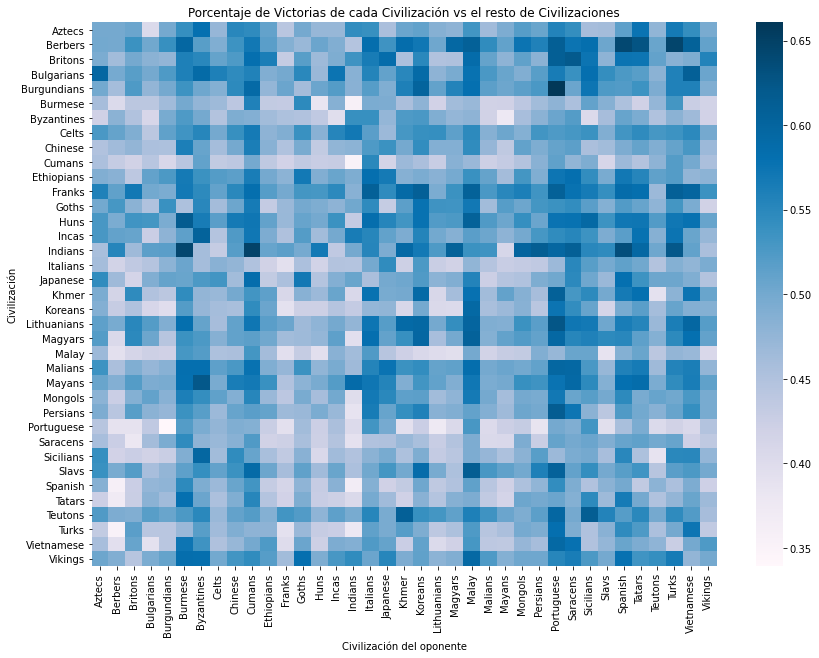

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
sns.heatmap(win_vs_singleplayer, cmap="PuBu")
plt.ylabel("Civilización")
plt.xlabel("Civilización del oponente")
plt.title("Porcentaje de Victorias de cada Civilización vs el resto de Civilizaciones")

In [37]:
melted_win_vs_singleplayer = win_vs_singleplayer.unstack().reset_index().rename(columns={0: "win_rate"})
melted_win_vs_singleplayer.sort_values("win_rate").nlargest(10, columns="win_rate").reset_index(drop=True)
melted_win_vs_singleplayer = melted_win_vs_singleplayer[["civ", "opponent_civ", "win_rate"]]
melted_win_vs_singleplayer.nlargest(21, columns="win_rate").reset_index(drop=True)

,civ,opponent_civ,win_rate
0,Burgundians,Portuguese,0.660777
1,Indians,Cumans,0.647059
2,Berbers,Turks,0.644531
3,Indians,Burmese,0.642045
4,Berbers,Spanish,0.641618
5,Indians,Spanish,0.633858
6,Berbers,Tatars,0.627097
7,Lithuanians,Portuguese,0.625461
8,Mayans,Byzantines,0.622962
9,Indians,Turks,0.622490
